Serrano Espinoza Edwin 


# ADALINE

## ¿Qué es?

ADALINE (ADAptative LInear NEuron) fue desarrollada por Widow y Hoff en 1960. Es una red simple de dos capas. La función de activación no linear en la salida es una función escalón producida por una unidad de límite binario. Esta red pude ser formada al simplemente añadir la función de escalón a la salida. [1] 

### Arquitectura

<img src="arquitectura.jpg">
Se puede apreciar la entrada que contiene varios nodos desde P1 a Pr que se conectan a cada neurona de la siguiente capa con sus pesos respectivos, luego sepuede onserva que cada neurona se conecta a su salida respectiva siendo calculada con una función Pureline.

### Diferencias con la red de perceptrón simple 

* El Perceptron usa las etiquetas de clase para aprender los coeficientes del modelo
* Adaline usa valores continuos pronosticados (de la entrada neta) para aprender los coeficientes del modelo, que es más "poderoso" ya que nos dice por "cuánto" estábamos en lo correcto o equivocado. [2]
Entonces, en el perceptrón, como se ilustra a continuación, simplemente usamos las etiquetas de clase predichas para actualizar los pesos, y en Adaline, usamos una respuesta continua:
<img src="4.png">
La regresión lineal y las neuronas lineales adaptativas (Adalines) están estrechamente relacionadas entre sí. De hecho, el algoritmo de Adaline es idéntico a la regresión lineal, excepto por una **función de umbral** φ(⋅)T
que convierte la salida continua en una etiqueta de clase categórica [3]:
<div style="text-align:center">   
    $
       \begin{split}
               φ{(z)}T=\begin{cases}
               1~ if & \mathbf{z \geq 0}\\
               0~ if & \mathbf{z < 0}
        \end{cases}
       \end{split}
    $
</div>

Donde $z$ es la entrada de la red, que se calcula como la suma de las características de entrada $x$ multiplicado por el peso del modelo $w$:
<div style="text-align:center">
    $z=w_{0}x_{0}+w_{1}x_{1}+....w_{m}x_{m} = \sum_{j=0}^{m} w_{j}x_{j} = w^{T} x$
</div>


### Ejemplo ADALINE:
En este ejemplo realizado por K. Hong, se usar el dataset iris para realizar una clasifiación con la red neuronal ADALINE, el proceso de optimizaicón usado es el de descen

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


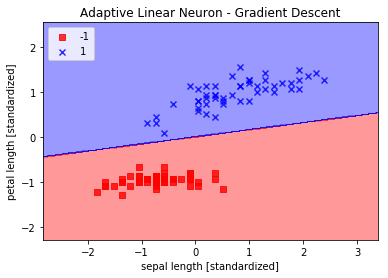

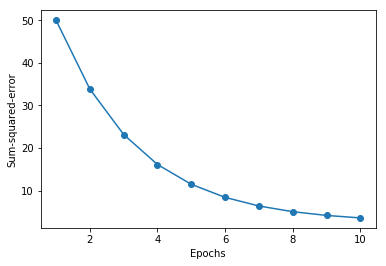

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap

class AdaptiveLinearNeuron(object):
   def __init__(self, rate = 0.01, niter = 10):
      self.rate = rate
      self.niter = niter

   def fit(self, X, y):


      # weights
      self.weight = np.zeros(1 + X.shape[1])

      # Number of misclassifications
      self.errors = []

      # Cost function
      self.cost = []

      for i in range(self.niter):
         output = self.net_input(X)
         errors = y - output
         self.weight[1:] += self.rate * X.T.dot(errors)
         self.weight[0] += self.rate * errors.sum()
         cost = (errors**2).sum() / 2.0
         self.cost.append(cost)
      return self

   def net_input(self, X):
      """Calculate net input"""
      return np.dot(X, self.weight[1:]) + self.weight[0]

   def activation(self, X):
      """Compute linear activation"""
      return self.net_input(X)

   def predict(self, X):
      """Return class label after unit step"""
      return np.where(self.activation(X) >= 0.0, 1, -1)

def plot_decision_regions(X, y, classifier, resolution=0.02):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
   x1_min, x1_max = X[:,  0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

   # plot class samples
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
      alpha=0.8, c=cmap(idx),
      marker=markers[idx], label=cl)

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values

# standardize
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

# learning rate = 0.01
aln = AdaptiveLinearNeuron(0.01, 10)
aln.fit(X_std,y)

# decision region plot
plot_decision_regions(X_std, y, classifier=aln)

plt.title('Adaptive Linear Neuron - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()

plt.plot(range(1, len(aln.cost) + 1), aln.cost, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

## Ejemplo

$R\quad =\quad \frac { 1 }{ 4 } \quad \left( \left( \begin{matrix} 1 \\ 2 \\ 1 \end{matrix} \right) \left( \begin{matrix} 1 & \quad 2 & \quad 1 \end{matrix} \right) \quad +\quad \left( \begin{matrix} 2 \\ 3 \\ 1 \end{matrix} \right) \left( \begin{matrix} 2 & \quad 3 & \quad 1 \end{matrix} \right) \quad +\quad \left( \begin{matrix} 3 \\ 1 \\ 1 \end{matrix} \right) \left( \begin{matrix} 3 & \quad 1 & \quad 1 \end{matrix} \right) \quad +\quad \left( \begin{matrix} 5 \\ 2 \\ 1 \end{matrix} \right) \left( \begin{matrix} 5 & \quad 2 & \quad 1 \end{matrix} \right)  \right) \\ \\ \\ \\ \\ \\ R\quad =\quad \frac { 1 }{ 4 } \quad \left( \begin{matrix} 39 & 21 & 11 \\ 21 & 18 & 8 \\ 11 & 8 & 4 \end{matrix} \right) \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \\ \\ \\ \\ \\ \\ \\ R\quad =\quad \frac { 1 }{ 4 } \quad \left( \begin{matrix} \frac { 39 }{ 4 }  & \frac { 21 }{ 4 }  & \frac { 11 }{ 4 }  \\ \frac { 21 }{ 4 }  & \frac { 9 }{ 2 }  & 2 \\ \frac { 11 }{ 4 }  & 2 & 1 \end{matrix} \right) \\ \\ \\ \\ \\ \\ R\quad =\quad \frac { 1 }{ 4 } \quad \left( -1\left( \begin{matrix} 1 \\ 2 \\ 1 \end{matrix} \right) \quad -1\quad \left( \begin{matrix} 2 \\ 3 \\ 1 \end{matrix} \right) \quad -1\quad \left( \begin{matrix} 3 \\ 1 \\ 1 \end{matrix} \right) \quad +\quad 1\quad \left( \begin{matrix} 5 \\ 2 \\ 1 \end{matrix} \right)  \right) \\ \\ \\ \\ \\ \\ \\ R\quad =\quad \frac { 1 }{ 4 } \quad \left( \left( \begin{matrix} 5 \\ -2 \\ 0 \end{matrix} \right) \quad  \right) \quad \quad =\quad \quad \quad \left[ \begin{matrix} 5/4 \\ -1/2 \\ 0 \end{matrix} \right] \\ \\ \\ \\ \\ \\ \\ \\ X=\quad \left( \begin{matrix} \frac { 16 }{ 33 }  & \frac { 8 }{ 33 }  & -\frac { 20 }{ 11 }  \\ \frac { 8 }{ 33 }  & \frac { 70 }{ 33 }  & -\frac { 54 }{ 11 }  \\ -\frac { 20 }{ 11 }  & -\frac { 54 }{ 11 }  & \frac { 174 }{ 11 }  \end{matrix} \right) \quad \quad \quad \quad \quad \quad \quad \left[ \begin{matrix} 5/4 \\ -1/2 \\ 0 \end{matrix} \right] \\ \\ \\ \\ \\ \\ \\ \\ X\quad =\quad \left[ \begin{matrix} 16/33 \\ -25/33 \\ 2/11 \end{matrix} \right] \quad \quad \\ \\ \\ \\ \\ \\ $

## Referencias
[1] Neural Networks for Intelligent Signal Processing Escrito por Anthony Zaknich
<br>
[2] https://sebastianraschka.com/faq/docs/diff-perceptron-adaline-neuralnet.html
<br>
[3] http://rasbt.github.io/mlxtend/user_guide/general_concepts/linear-gradient-derivative/
<br>
[4] MADALINE RULE II: A Training Algorithm for Neural Networks by Capt. Rodney Winter, USAF and pt. Rodney Winter, USAF Dept. of Electrical Engineering Stanford University